In [33]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [34]:
from personality import *
from text2speech import *

In [35]:

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta



def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

In [36]:
def data_from_personality(personality):
    ret = [personality.traits.keys()]
    values = map(lambda x: x.value, personality.traits.values())
    ret += [('personality', [values])]
    return ret

In [37]:
def plot(person):
    theta = radar_factory(len(person.traits), frame='circle')
    fig, ax = plt.subplots(figsize=(9,9), nrows=1, ncols=1, 
                        subplot_kw=dict(projection='radar'))
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0])
    d = map(lambda x: x.value, person.traits.values())
    spoke_labels = person.traits.keys()
    ax.plot(theta, d, color='b')
    ax.fill(theta, d, facecolor='b', alpha=0.25)
    ax.set_varlabels(spoke_labels)
    

In [6]:
person = default_westworld(random_sample=True)

In [21]:
deadpool = Personality({
        'candor': Personality({},0.327968441058), 
        'humor': Personality({},0.8), 
        'sensuality': Personality({},0.0182078173444), 
        'meekness': Personality({},0.279194061694), 
        'patience': Personality({},0.501958325355), 
        'humility': Personality({},0.0962733669697), 
        'dicisiveness': Personality({},0.661996114557), 
        'cruelty': Personality({},0.190359662961), 
        'loyalty': Personality({},0.0563648414791), 
        'bulk_apperception': Personality({},0.158591194227), 
        'imagination': Personality({},0.087924103947), 
        'courage': Personality({},0.177088500001), 
        'charm': Personality({},0.050657729733), 
        'curiosity': Personality({},0.0517482304861), 
        'tenacity': Personality({},0.157381525783), 
        'vivacity': Personality({},0.420031947549), 
        'self_preservation': Personality({},0.315296233437), 
        'empathy': Personality({},0.0301127575948), 
        'coordination': Personality({},0.75), 
        'aggression': Personality({},0.739720148427)},
                      0.436319405761)


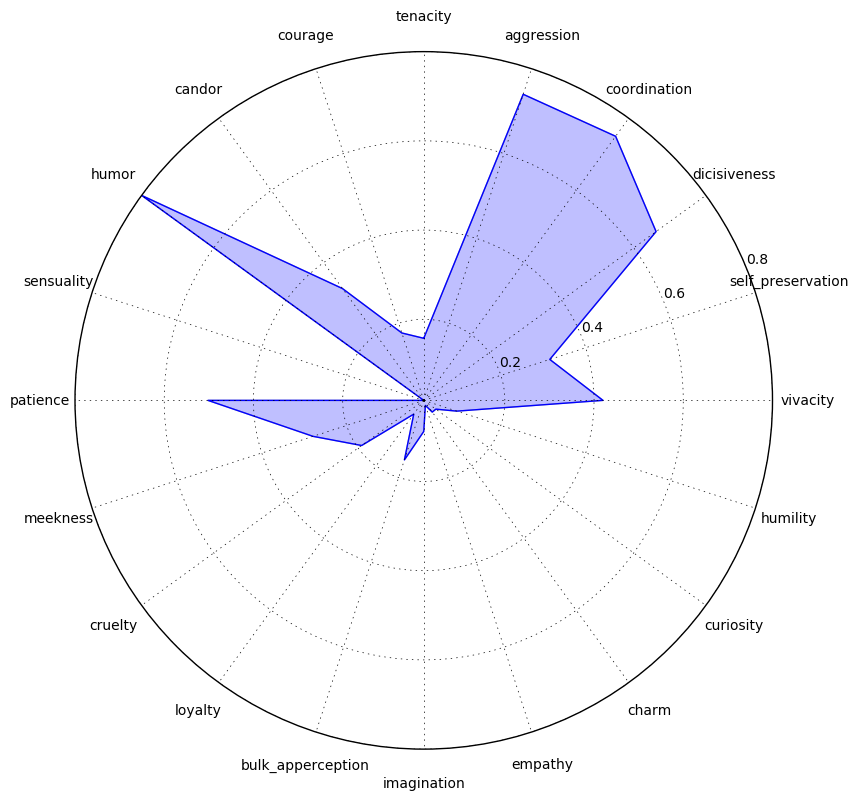

In [22]:

plot(deadpool)

In [8]:
deadpool = Personality.from_json_file('deadpool.json')
deadpool.traits

{u'aggression': Personality({},0.739720148427),
 u'bulk_apperception': Personality({},0.158591194227),
 u'candor': Personality({},0.327968441058),
 u'charm': Personality({},0.050657729733),
 u'coordination': Personality({},0.75),
 u'courage': Personality({},0.177088500001),
 u'cruelty': Personality({},0.190359662961),
 u'curiosity': Personality({},0.0517482304861),
 u'dicisiveness': Personality({},0.661996114557),
 u'empathy': Personality({},0.0301127575948),
 u'humility': Personality({},0.0962733669697),
 u'humor': Personality({},0.8),
 u'imagination': Personality({},0.087924103947),
 u'loyalty': Personality({},0.0563648414791),
 u'meekness': Personality({},0.279194061694),
 u'patience': Personality({},0.501958325355),
 u'self_preservation': Personality({},0.315296233437),
 u'sensuality': Personality({},0.0182078173444),
 u'tenacity': Personality({},0.157381525783),
 u'vivacity': Personality({},0.420031947549)}

In [23]:
akeylah = default_westworld()
akeylah['humor'] = 0.8
akeylah['candor'] = 0.75
akeylah['aggression'] = 0.2
akeylah['coordination'] = 0.2
akeylah['empathy'] = 0.95
akeylah['self_preservation'] = 0.5
akeylah['vivacity'] = 0.7
akeylah['tenacity'] = 0.7
akeylah['curiosity'] = 0.7
akeylah['charm'] = 0.6
akeylah['courage'] = 0.5
akeylah['imagination'] = 0.8
akeylah['bulk_apperception'] = 0.8
akeylah['loyalty'] = 0.8
akeylah['cruelty'] = 0.2
akeylah['dicisiveness'] = 0.1
akeylah['humility'] = 0.8
akeylah['patience'] = 0.3
akeylah['meekness'] = 0.6
akeylah['sensuality'] = 0.7
akeylah.to_file('akeylah.json')

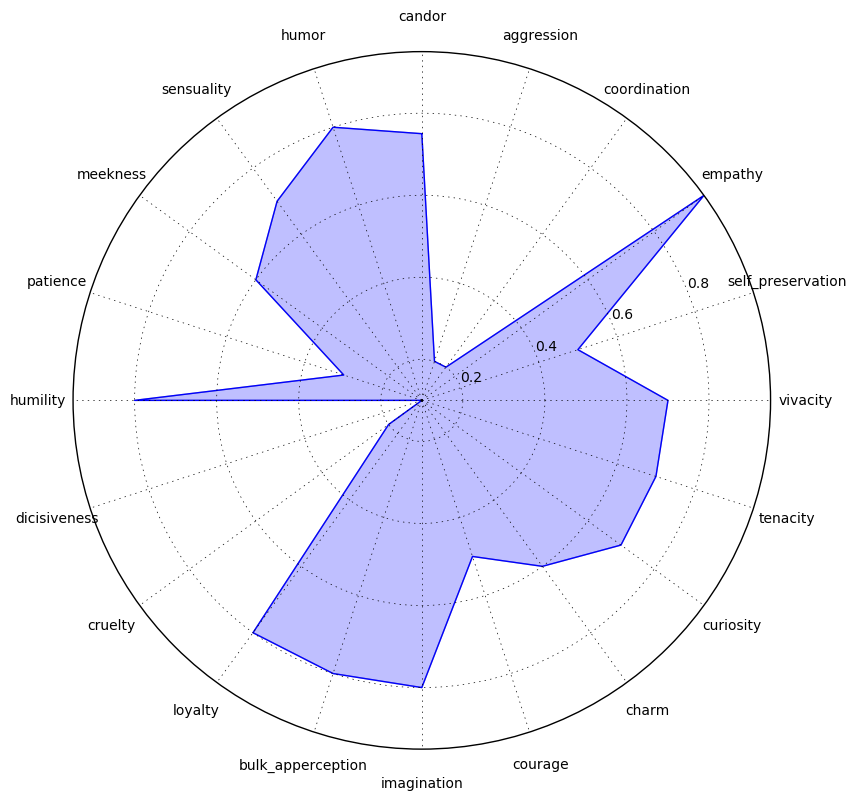

In [24]:
plot(akeylah)

In [39]:
alex = default_westworld()
alex['humor'] = .8
alex['candor'] = 0.4
alex['aggression'] = 0.9
alex['coordination'] = 0.5
alex['empathy'] = 0.75
alex['self_preservation'] = 0.4
alex['vivacity'] = 0.5
alex['tenacity'] = 0.8
alex['curiosity'] = 0.7
alex['charm'] = 0.3
alex['courage'] = 0.9
alex['imagination'] = 0.7
alex['bulk_apperception'] = 0.8
alex['loyalty'] = 0.9
alex['cruelty'] = 0.7
alex['dicisiveness'] = 0.5
alex['humility'] = 0.8
alex['patience'] = 0.6
alex['meekness'] = 0.8
alex['sensuality'] = 0.2
alex.to_file('alex.json')

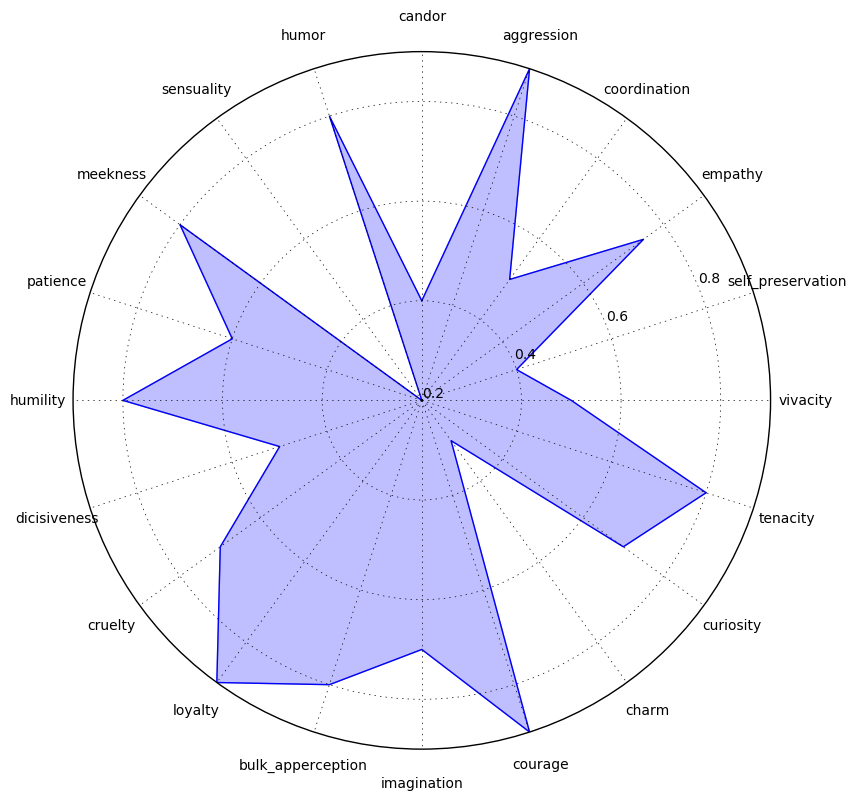

In [28]:
plot(alex)

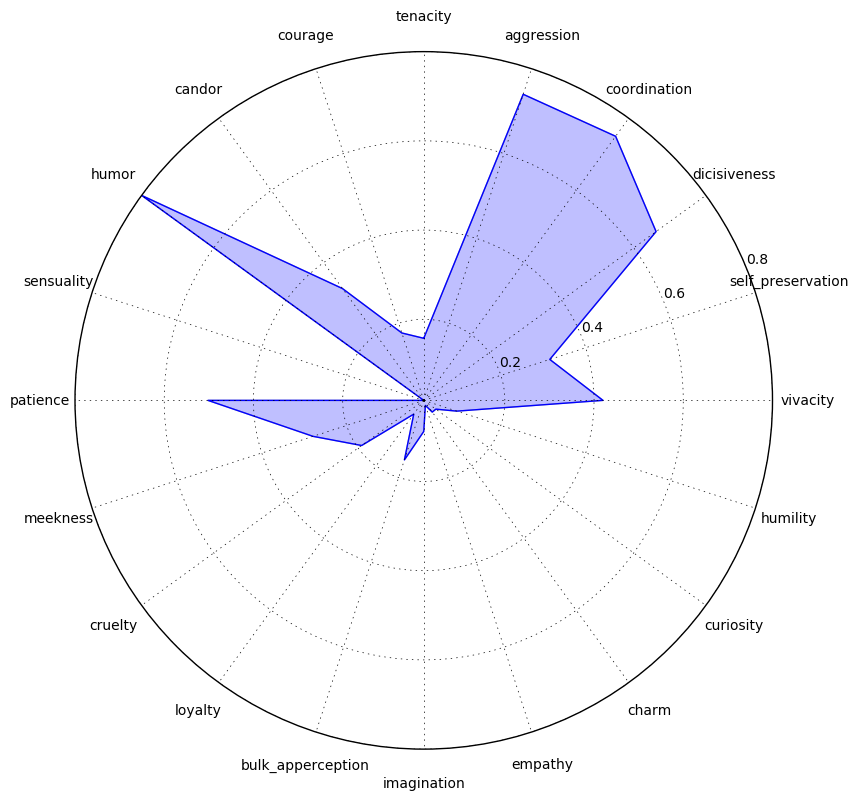

In [32]:
conrado = Personality({
        'candor': Personality({},0.327968441058), 
        'humor': Personality({},0.8), 
        'sensuality': Personality({},0.0182078173444), 
        'meekness': Personality({},0.279194061694), 
        'patience': Personality({},0.501958325355), 
        'humility': Personality({},0.0962733669697), 
        'dicisiveness': Personality({},0.661996114557), 
        'cruelty': Personality({},0.190359662961), 
        'loyalty': Personality({},0.0563648414791), 
        'bulk_apperception': Personality({},0.158591194227), 
        'imagination': Personality({},0.087924103947), 
        'courage': Personality({},0.177088500001), 
        'charm': Personality({},0.050657729733), 
        'curiosity': Personality({},0.0517482304861), 
        'tenacity': Personality({},0.157381525783), 
        'vivacity': Personality({},0.420031947549), 
        'self_preservation': Personality({},0.315296233437), 
        'empathy': Personality({},0.0301127575948), 
        'coordination': Personality({},0.75), 
        'aggression': Personality({},0.739720148427)},
                      0.436319405761)
conrado.to_file('conrado.json')
plot(conrado)